In [11]:
import os
import numpy as np
import pandas as pd
path = 'batch_run_2/'
bla = os.listdir('batch_run_2/')
bla.sort()
runs = []
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
from matplotlib.lines import Line2D

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
for file in bla:
  runs.append(pd.read_csv(path+file))

In [4]:
means = []
stds = []
for run in runs:
  means.append(run.mean())
  stds.append(run.std())

In [5]:
means2 = means[:-1]
stds2 = stds[:-1]

In [6]:
df = pd.DataFrame(means2)
dfs = pd.DataFrame(stds2)

In [7]:
df['avg_speed_std'] = dfs['avg_speed']
df['cars_in_lane_std'] = dfs['cars_in_lane']

In [8]:
df

,avg_speed,cars_in_lane,spawn_chance,agression,min_gap,avg_speed_std,cars_in_lane_std
0,101.517819,49.5188,0.1,0.9,0.5,0.948538,12.867121
1,101.317055,46.2913,0.1,0.9,1.0,1.146516,10.633257
2,101.309980,51.1977,0.1,0.9,1.5,1.352446,14.896302
3,101.103515,47.3409,0.1,0.9,2.0,1.572019,13.493424
4,100.685993,47.3096,0.1,0.9,2.5,1.744219,11.154120
5,100.283205,47.5399,0.1,0.9,3.0,1.857977,13.290428
6,99.693396,50.2976,0.1,0.9,3.5,2.053298,13.883116
7,98.909426,51.2450,0.1,0.9,4.0,2.106772,14.019702
8,99.382050,44.7344,0.1,0.9,4.5,2.085479,11.701305
9,102.047869,50.3431,0.1,0.8,0.5,0.624520,12.906736


In [22]:
def std_error_calc(x,y):
    unique_values = x.unique().tolist()
    unique_values.sort()
    positions = []
    for i in unique_values:
        counter = 0
        cache = []
        for k in x.tolist():
            if i == k:
                cache.append(counter)
            counter = counter +1
        positions.append(cache)
    values = []
    for i in positions:
        cache = []
        for k in i:
            cache.append(y.tolist()[k])
        values.append(cache)
    errors = []
    means = []
    for i in values:
        errors.append(1.96*np.std(i)/np.sqrt(len(i)))
        means.append(np.mean(i))
    return np.asarray(unique_values),np.asarray(means),np.asarray(errors)

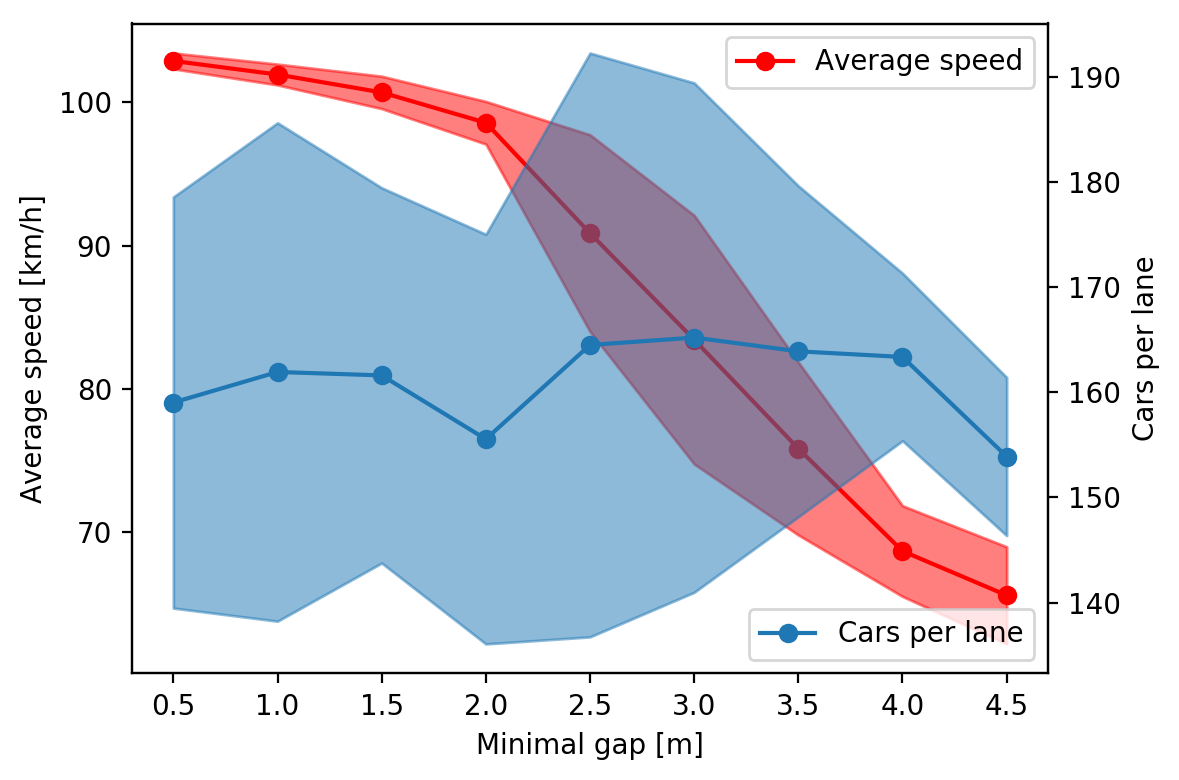

In [49]:
ofat1 = df.loc[(df['spawn_chance'] > 0.3) & (df['spawn_chance'] < 0.5)]
ofat1 = ofat1.loc[(ofat1['agression'] >0.4) & (ofat1['agression'] < 0.6)]

fig, ax1 = plt.subplots()
x,y,errors = std_error_calc(ofat1['min_gap'],ofat1['avg_speed'])
ax1.plot(x,y, marker = 'o', c = 'r')
ax1.fill_between(x, y - errors,y+errors, color = 'r', alpha = 0.5)

ax1.set_xlabel('Minimal gap [m]')
ax1.set_ylabel('Average speed [km/h]')
ax1.legend(('Average speed',), loc = 1)
ax2 = ax1.twinx()
x,y,errors = std_error_calc(ofat1['min_gap'],ofat1['cars_in_lane'])

ax2.plot(x,y, marker = 'o', c = '#1f77b4')
ax2.fill_between(x, y - errors,y+errors, color = '#1f77b4', alpha = 0.5)
ax1.legend(('Average speed',), loc = 1)
ax2.legend(('Cars per lane',), loc = 4)
ax2.set_ylabel('Cars per lane')

fig.tight_layout()
plt.show()


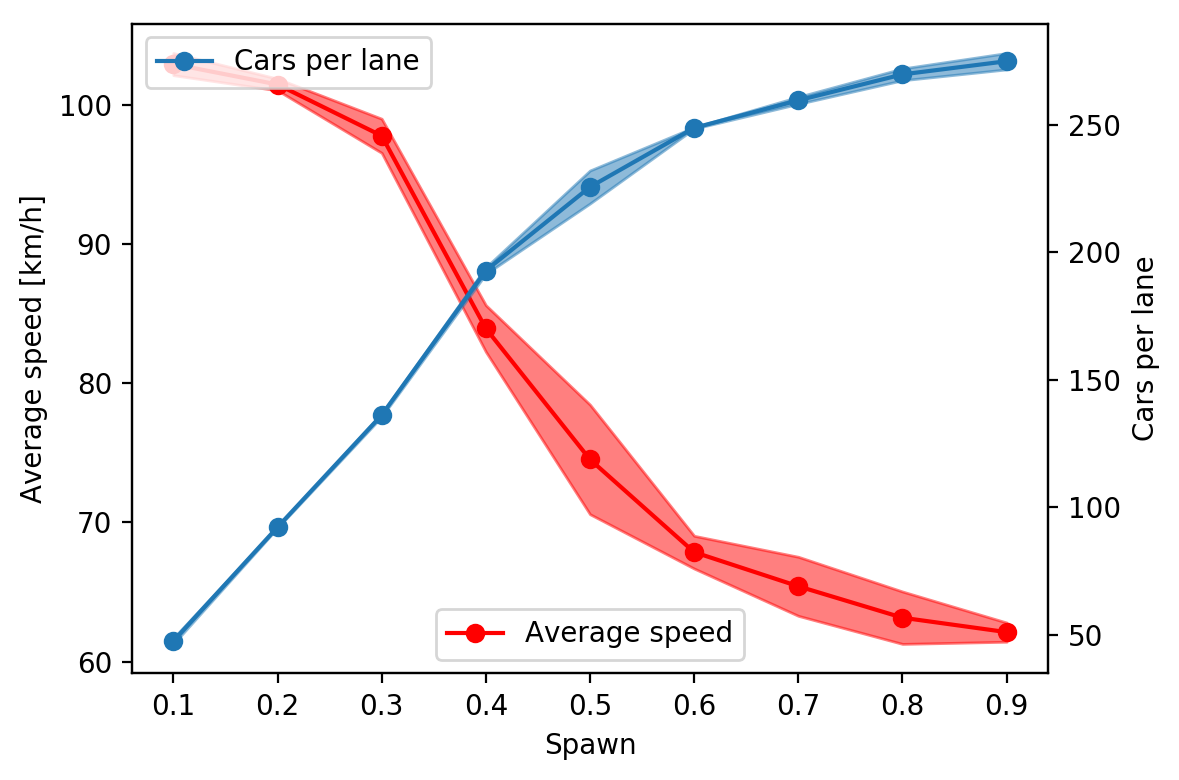

In [50]:
ofat1 = df.loc[(df['min_gap'] > 2.1) & (df['min_gap'] < 2.6)]
ofat1 = ofat1.loc[(ofat1['agression'] >0.4) & (ofat1['agression'] < 0.6)]

fig, ax1 = plt.subplots()
x,y,errors = std_error_calc(ofat1['spawn_chance'],ofat1['avg_speed'])
ax1.plot(x,y, marker = 'o', c = 'r')
ax1.fill_between(x, y - errors,y+errors, color = 'r', alpha = 0.5)

ax1.set_xlabel('Spawn')
ax1.set_ylabel('Average speed [km/h]')
ax1.legend(('Average speed',), loc = 1)
ax2 = ax1.twinx()
x,y,errors = std_error_calc(ofat1['spawn_chance'],ofat1['cars_in_lane'])

ax2.plot(x,y, marker = 'o', c = '#1f77b4')
ax2.fill_between(x, y - errors,y+errors, color = '#1f77b4', alpha = 0.5)
ax1.legend(('Average speed',), loc = 8)
ax2.legend(('Cars per lane',), loc = 2)
ax2.set_ylabel('Cars per lane')

fig.tight_layout()
plt.show()


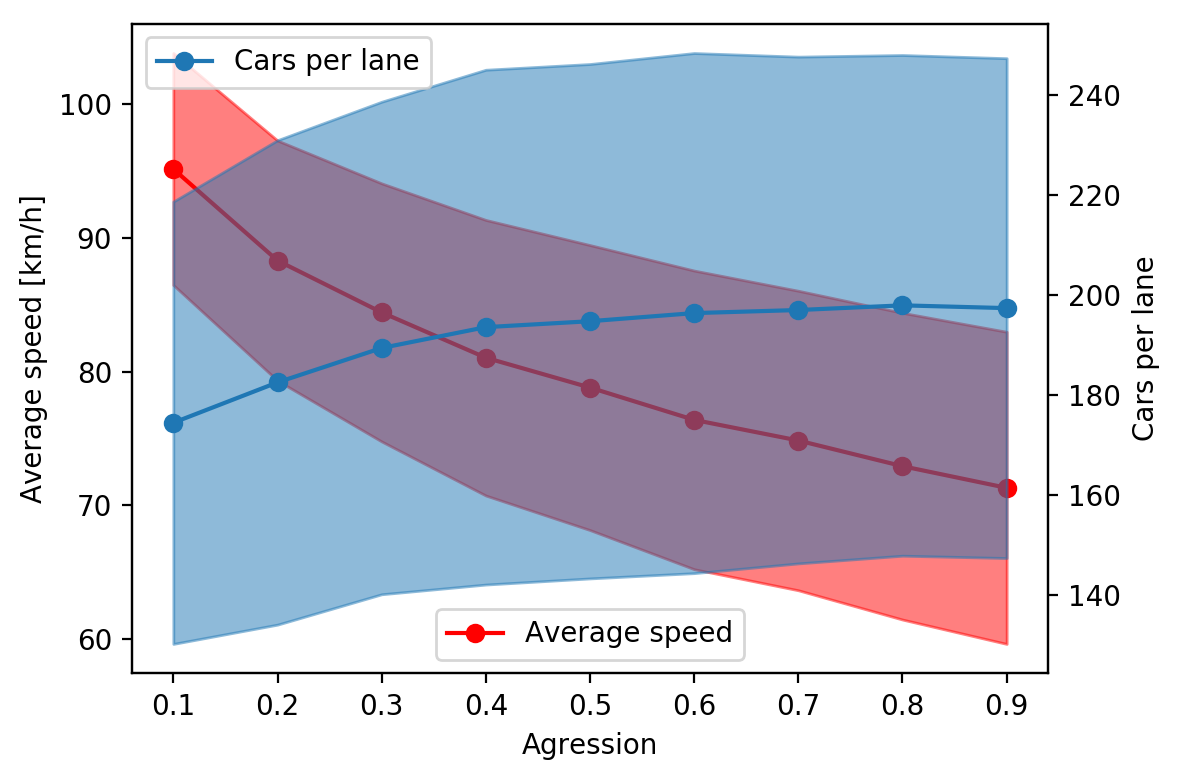

In [51]:
ofat1 = df.loc[(df['spawn_chance'] > 0.3) & (df['spawn_chance'] < 0.5)]
ofat1 = df.loc[(df['min_gap'] > 2.1) & (df['min_gap'] < 2.6)]

fig, ax1 = plt.subplots()
x,y,errors = std_error_calc(ofat1['agression'],ofat1['avg_speed'])
ax1.plot(x,y, marker = 'o', c = 'r')
ax1.fill_between(x, y - errors,y+errors, color = 'r', alpha = 0.5)

ax1.set_xlabel('Agression')
ax1.set_ylabel('Average speed [km/h]')
ax1.legend(('Average speed',), loc = 1)
ax2 = ax1.twinx()
x,y,errors = std_error_calc(ofat1['agression'],ofat1['cars_in_lane'])

ax2.plot(x,y, marker = 'o', c = '#1f77b4')
ax2.fill_between(x, y - errors,y+errors, color = '#1f77b4', alpha = 0.5)
ax1.legend(('Average speed',), loc = 8)
ax2.legend(('Cars per lane',), loc = 2)
ax2.set_ylabel('Cars per lane')

fig.tight_layout()
plt.show()


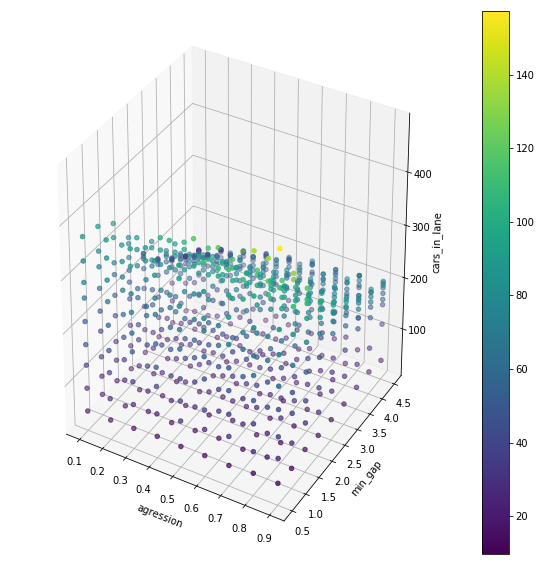

In [54]:
driedee = plt.figure(figsize=(10,10)).gca(projection='3d')
x_as = 'agression'
y_as = 'min_gap'
z_as = 'cars_in_lane'
kleur = 'cars_in_lane_std'
p = driedee.scatter(df[x_as], df[y_as], df[z_as], c=df[kleur])
driedee.set_xlabel(x_as)
driedee.set_ylabel(y_as)
driedee.set_zlabel(z_as)
plt.colorbar(p)
plt.show()

<IPython.core.display.Javascript object>


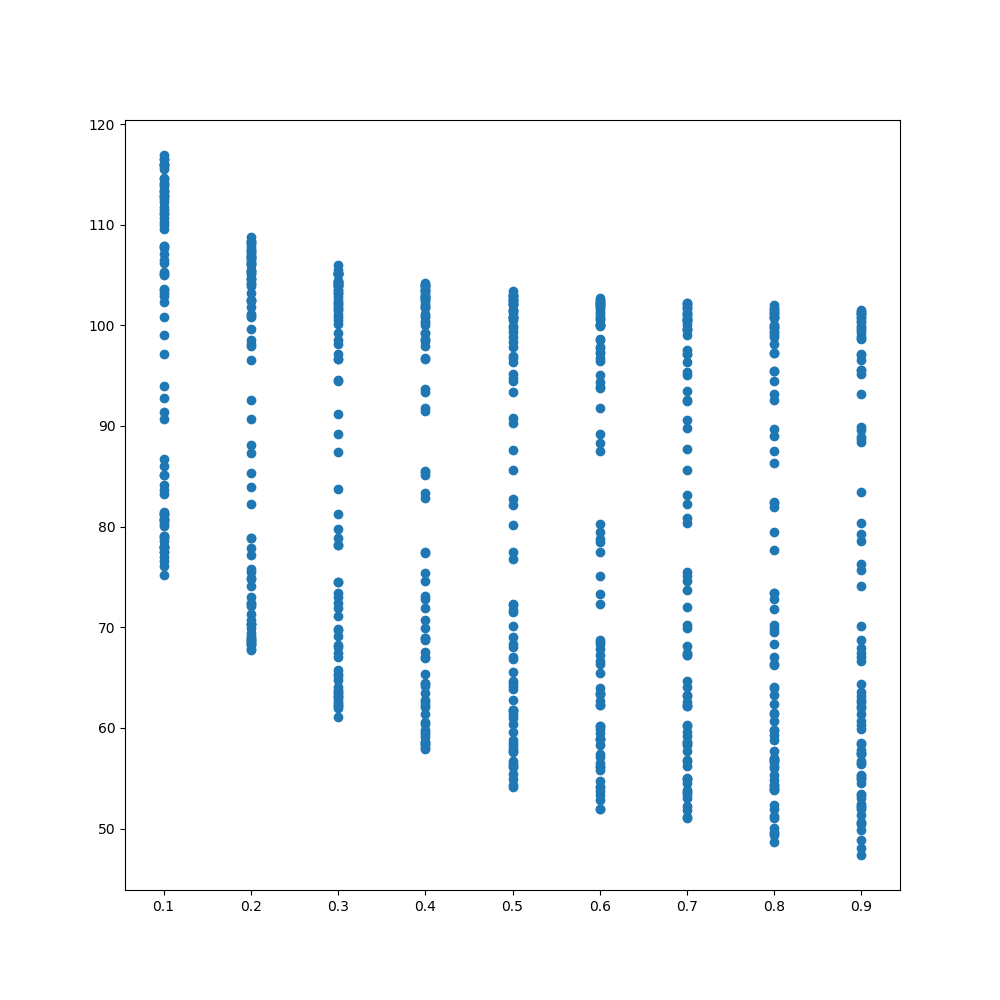

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(df['agression'], df['avg_speed'])
plt.show()

<IPython.core.display.Javascript object>


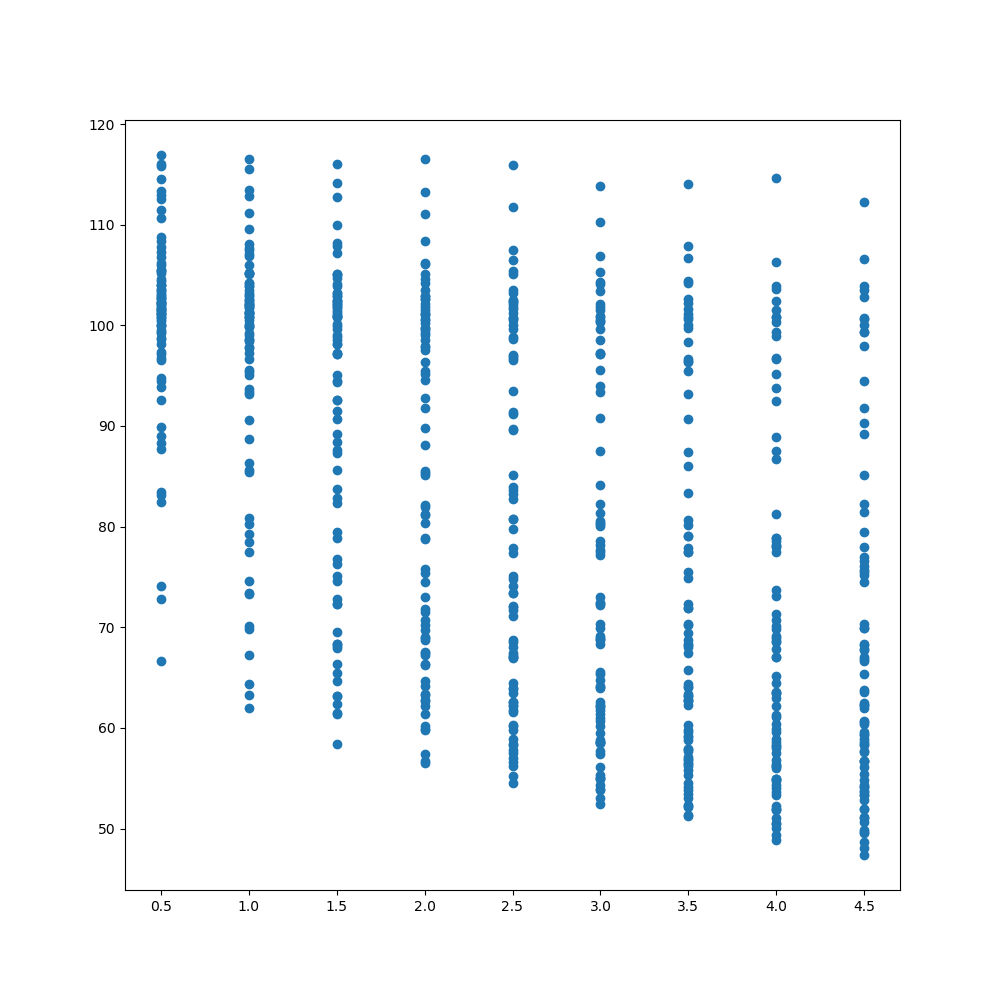

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(df['min_gap'], df['avg_speed'])
plt.show()

In [46]:
run3 = pd.read_csv('br3.csv')

In [49]:
run3.drop(run3.columns[0], axis=1, inplace=True)

In [51]:
run3_group = run3.groupby('Run')

In [53]:
import numpy as np
s3 = run3_group.agg([np.mean, np.std])

In [54]:
s3

Avg_speed           Cars_in_lane            spawn_rate  \
                           mean       std         mean        std       mean   
Run                                                                            
-9189439709138103988   7.587566  1.898708     208.5013  49.409243       0.45   
-8869627827381722164   2.242663  1.568434     138.2658  37.854287       0.30   
-8596177984370799796   2.161343  1.384274     138.1496  33.974674       0.30   
-8103797664554621620   6.890162  1.911892     212.8196  52.143425       0.45   
-7939856466383926068   7.602650  2.149903     151.2208  37.418146       0.35   
-7701008526074044340   6.769122  1.978945     211.1100  55.926916       0.45   
-7184739403333654580   4.208261  1.593897     181.8504  51.588450       0.40   
-6604025831884162612   3.071895  1.248756     167.3621  41.659015       0.35   
-4848251096531841972   2.219829  0.925178     156.3374  43.789187       0.35   
-4311044934032004916   9.173912  2.421719     231.7750  58.688287       0.50   
-4086099820365859956   1.828946  1.139927     136.8588  37.589429       0.30   
-3985108465836883188   3.878042  1.821314     185.7225  49.024188       0.40   
-3812569260747012916   2.228380  1.909332     149.4967  35.203118       0.30   
-3761124772631808564   7.955898  2.590123     228.1635  61.113598       0.50   
-3577544934308569652   5.077382  1.325514     173.4540  42.619560       0.40   
-3339560331138382516   4.303067  2.015970     186.1483  45.637822       0.40   
-3156787658894390324   8.289908  1.855787     232.1434  57.823824       0.50   
-2932238949433842996   8.525960  2.037614     169.8003  41.724023       0.40   
-2606383197846645940  10.937110  2.187475     248.1416  63.238163       0.50   
-2069177035346808884   3.633490  1.232969     169.9080  44.998476       0.35   
-1412649882230465716   6.531943  1.940189     211.4701  53.627582       0.45   
-1038538295251706164  10.600277  3.187395     248.7328  70.874424       0.50   
 784064693842941516    7.169443  2.082270     219.3570  54.012233       0.45   
 1022509051113199884   2.613008  1.011437     164.8166  42.106193       0.35   
 1186369532675970764   5.534274  1.847649     210.4757  55.071471       0.45   
 1507795746590846028   3.545612  1.132813     139.9510  34.778846       0.30   
 1780115557090822988   6.025008  1.901519     126.4559  29.165403       0.30   
 2272334443691151820   6.646208  2.138027     216.4997  57.923551       0.45   
 2436437075077696716   3.089253  1.910729     169.2491  39.727382       0.35   
 2675204298779653772   6.450701  2.796298     209.9328  54.840487       0.45   
 3221069403205141452   4.002631  1.284837     150.4541  39.281431       0.35   
 3759567031431773260   8.020257  2.199613     229.4284  59.652976       0.50   
 4085422783018970316   4.940718  1.871527     189.8323  48.152168       0.40   
 4309245043008195596   9.998839  2.768692     236.4812  59.175120       0.50   
 4730728767893696972   4.248257  1.291318     182.6499  48.479878       0.40   
 6290274437703687500   2.446867  0.960203     138.1797  36.058539       0.30   
 6563885713930459212   2.573617  1.101343     130.2757  31.749452       0.30   
 6798587173937203788   3.988898  1.958573     190.1201  45.123802       0.40   
 7219505882567232460  13.094799  3.094408     229.7574  56.168890       0.50   
 7444054592027779788   3.403404  1.251086     181.6841  44.595840       0.40   
 7770717509694223564   9.796713  2.625432     234.0907  59.054910       0.50   
 8307277939330663244   2.557021  1.329259     162.7030  38.057998       0.35   
 8376471729935894092   2.331330  0.992835     147.9587  36.813850       0.30   
 8854515226090870348   9.562790  2.166846     194.2918  48.685364       0.45   
 9093040299969053388   3.310425  1.660156     161.4631  43.346037       0.35   

                          agression       
                      std      mean  std  
Run                                       
-9189439709138103988  0.0       0.2  0.0  
-88696278

In [55]:
s3.columns

MultiIndex(levels=[['Avg_speed', 'Cars_in_lane', 'spawn_rate', 'agression'], ['mean', 'std']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]])

<IPython.core.display.Javascript object>


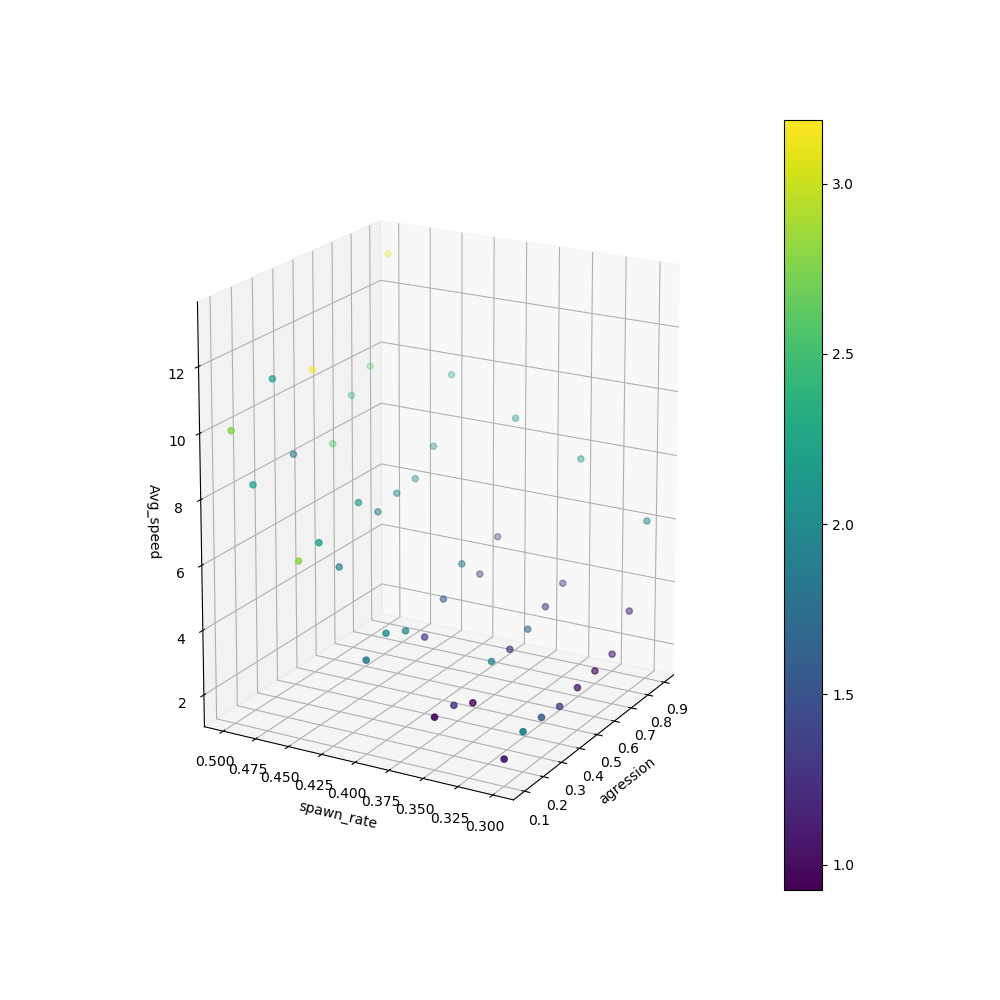

In [61]:
driedee = plt.figure(figsize=(10,10)).gca(projection='3d')
x_as = 'agression'
y_as = 'spawn_rate'
z_as = 'Avg_speed'
kleur = 'Avg_speed'
p = driedee.scatter(1-s3[x_as,'mean'], s3[y_as,'mean'], s3[z_as,'mean'], c=s3[kleur,'std'])
driedee.set_xlabel(x_as)
driedee.set_ylabel(y_as)
driedee.set_zlabel(z_as)
plt.colorbar(p)
plt.show()

In [59]:
df['agression']

0      0.9
1      0.9
2      0.9
3      0.9
4      0.9
5      0.9
6      0.9
7      0.9
8      0.9
9      0.8
10     0.8
11     0.8
12     0.8
13     0.8
14     0.8
15     0.8
16     0.8
17     0.8
18     0.7
19     0.7
20     0.7
21     0.7
22     0.7
23     0.7
24     0.7
25     0.7
26     0.7
27     0.6
28     0.6
29     0.6
      ... 
699    0.4
700    0.4
701    0.4
702    0.3
703    0.3
704    0.3
705    0.3
706    0.3
707    0.3
708    0.3
709    0.3
710    0.3
711    0.2
712    0.2
713    0.2
714    0.2
715    0.2
716    0.2
717    0.2
718    0.2
719    0.2
720    0.1
721    0.1
722    0.1
723    0.1
724    0.1
725    0.1
726    0.1
727    0.1
728    0.1
Name: agression, Length: 729, dtype: float64

In [8]:
run_lanes = pd.read_csv('batch_run_lanes.csv')

In [9]:
run_lanes.drop(run_lanes.columns[0], axis=1, inplace=True)

In [10]:
run_lanes_group = run_lanes.groupby('Run')

In [11]:
rlg_5000 = run_lanes_group.tail(5000).groupby('Run')

In [12]:
import numpy as np
rlanes = rlg_5000.agg(np.mean)

In [13]:
rlanes

,Avg_speed,Cars_in_lane,Avg_slowdown,spawn_chance,agression,lanes
Run,,,,,,
-8869627827379392066,76.541517,173.9846,24.332963,0.3,0.3,3.0
-8869627827378227017,79.018376,227.3300,21.807500,0.3,0.3,4.0
-8869627827377061968,77.772261,279.6054,23.082576,0.3,0.3,5.0
-7544747479821721730,101.301526,53.2530,1.325562,0.1,0.9,3.0
-7544747479820556681,100.715028,79.2244,1.824074,0.1,0.9,4.0
-7544747479819391632,100.705254,86.6554,1.916565,0.1,0.9,5.0
-7329156073893653698,52.294164,288.2424,48.544974,0.7,0.3,3.0
-7329156073892488649,51.071259,380.3934,49.759098,0.7,0.3,4.0
-7329156073891323600,51.153247,487.9812,49.666820,0.7,0.3,5.0


In [14]:
rl2 = pd.read_csv('batch_lanes_2.csv')
rl2.drop(rl2.columns[0], axis=1, inplace=True)
rl2g = rl2.groupby('Run')
rl2g = rl2g.tail(5000).groupby('Run')
rl2gm = rl2g.agg(np.mean)

In [15]:
rl3 = pd.read_csv('batch_run_lanes_Toby.csv')
rl3.drop(rl3.columns[0], axis=1, inplace=True)
rl3g = rl3.groupby('Run')
rl3g = rl3g.tail(4000).groupby('Run')
rl3gm = rl3g.agg(np.mean)

In [16]:
rl4 = pd.read_csv('lanes_local.csv')
rl4.drop(rl4.columns[0], axis=1, inplace=True)
rl4g = rl4.groupby('Run')
rl4g = rl4g.tail(5000).groupby('Run')
rl4gm = rl4g.agg(np.mean)

In [17]:
rl5 = pd.read_csv('lennart.csv')
rl5.drop(rl5.columns[0], axis=1, inplace=True)
rl5g = rl5.groupby('Run')
rl5g = rl5g.tail(5000).groupby('Run')
rl5gm = rl5g.agg(np.mean)

In [18]:
rl6 = pd.read_csv('toby2.csv')
rl6.drop(rl6.columns[0], axis=1, inplace=True)
rl6g = rl6.groupby('Run')
rl6g = rl6g.tail(5000).groupby('Run')
rl6gm = rl6g.agg(np.mean)

<IPython.core.display.Javascript object>


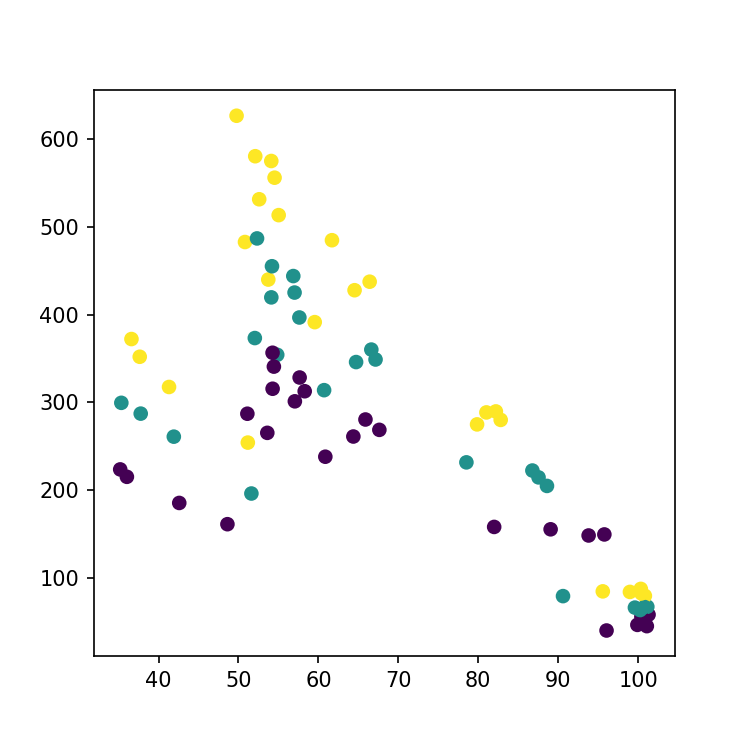

In [28]:
x_as = 'Avg_speed'
z_as = 'spawn_chance'
y_as = 'Cars_in_lane'
kleur = 'lanes'
plt.figure(figsize=(5,5))
plt.scatter(rl3gm[x_as], rl3gm[y_as], c=rl3gm[kleur])
plt.show()

<IPython.core.display.Javascript object>


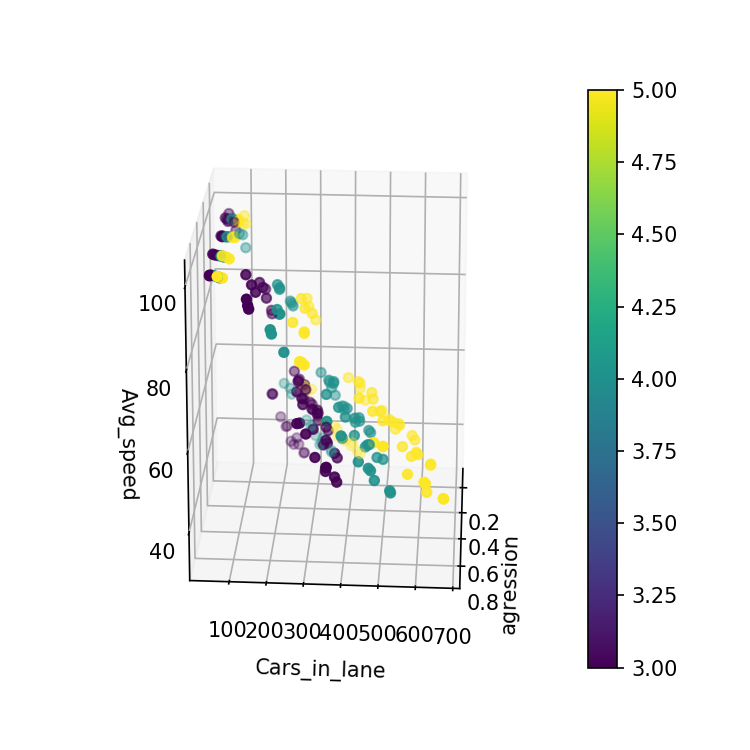

In [18]:
driedee = plt.figure(figsize=(5,5)).gca(projection='3d')
x_as = 'agression'
y_as = 'Cars_in_lane'
z_as = 'Avg_speed'
kleur = 'lanes'
p = driedee.scatter(rlanes[x_as], rlanes[y_as], rlanes[z_as], c=rlanes[kleur])
p2 = driedee.scatter(rl2gm[x_as], rl2gm[y_as], rl2gm[z_as], c=rl2gm[kleur])
p3 = driedee.scatter(rl3gm[x_as], rl3gm[y_as], rl3gm[z_as], c=rl3gm[kleur])
driedee.set_xlabel(x_as)
driedee.set_ylabel(y_as)
driedee.set_zlabel(z_as)
plt.colorbar(p)
plt.show()

<IPython.core.display.Javascript object>


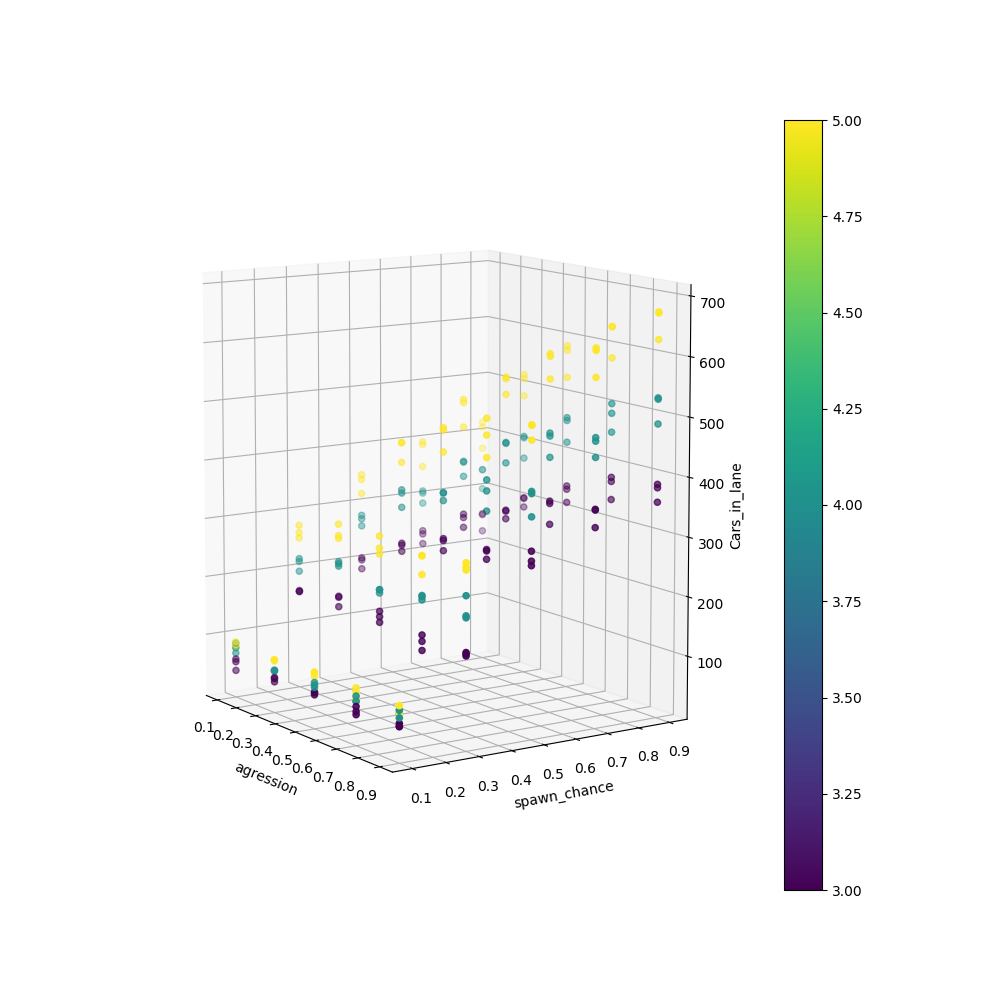

In [41]:
driedee = plt.figure(figsize=(10,10)).gca(projection='3d')
x_as = 'agression'
y_as = 'spawn_chance'
z_as = 'Cars_in_lane'
kleur = 'lanes'
p = driedee.scatter(rlanes[x_as], rlanes[y_as], rlanes[z_as], c=rlanes[kleur])
p2 = driedee.scatter(rl2gm[x_as], rl2gm[y_as], rl2gm[z_as], c=rl2gm[kleur])
p3 = driedee.scatter(rl3gm[x_as], rl3gm[y_as], rl3gm[z_as], c=rl3gm[kleur])
driedee.set_xlabel(x_as)
driedee.set_ylabel(y_as)
driedee.set_zlabel(z_as)
plt.colorbar(p)
plt.show()

<IPython.core.display.Javascript object>


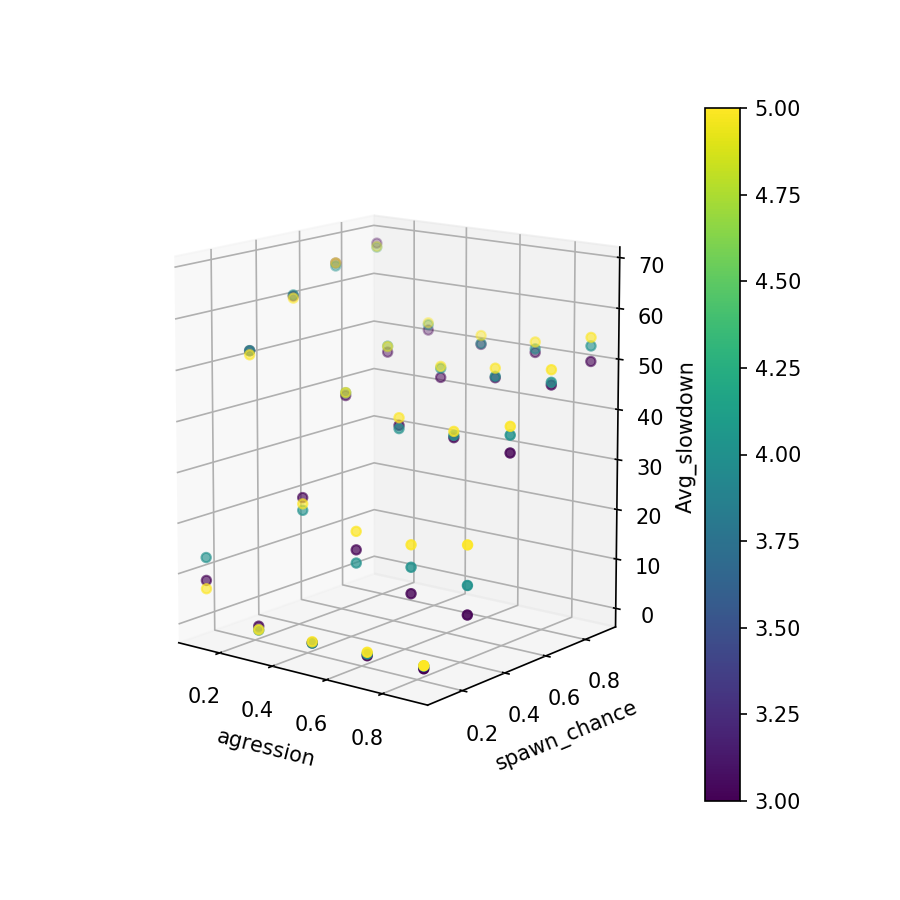

In [19]:
driedee = plt.figure(figsize=(6,6)).gca(projection='3d')
x_as = 'agression'
y_as = 'spawn_chance'
z_as = 'Avg_slowdown'
kleur = 'lanes'
p = driedee.scatter(rlanes[x_as], rlanes[y_as], rlanes[z_as], c=rlanes[kleur])
driedee.set_xlabel(x_as)
driedee.set_ylabel(y_as)
driedee.set_zlabel(z_as)
plt.colorbar(p)
plt.show()

In [27]:
rl2 = pd.read_csv('batch_lanes_2.csv')
rl2.drop(rl2.columns[0], axis=1, inplace=True)
rl2g = rl2.groupby('Run')
rl2g = rl2g.tail(5000).groupby('Run')
rl2gm = rl2g.agg(np.mean)

In [28]:
rl2gm

,Avg_speed,Cars_in_lane,Avg_slowdown,spawn_chance,agression,lanes
Run,,,,,,
-8869627827379392066,75.650817,175.7838,25.175523,0.3,0.3,3.0
-8869627827378227017,77.799090,234.9844,23.020138,0.3,0.3,4.0
-8869627827377061968,74.333500,299.0510,26.498494,0.3,0.3,5.0
-7544747479821721730,101.161208,52.7092,1.683183,0.1,0.9,3.0
-7544747479820556681,100.980709,73.5622,1.578836,0.1,0.9,4.0
-7544747479819391632,101.028871,73.2650,1.656370,0.1,0.9,5.0
-7329156073893653698,52.828347,282.2528,48.033609,0.7,0.3,3.0
-7329156073892488649,51.981600,378.9712,48.857008,0.7,0.3,4.0
-7329156073891323600,50.944340,482.3824,49.914363,0.7,0.3,5.0


<IPython.core.display.Javascript object>


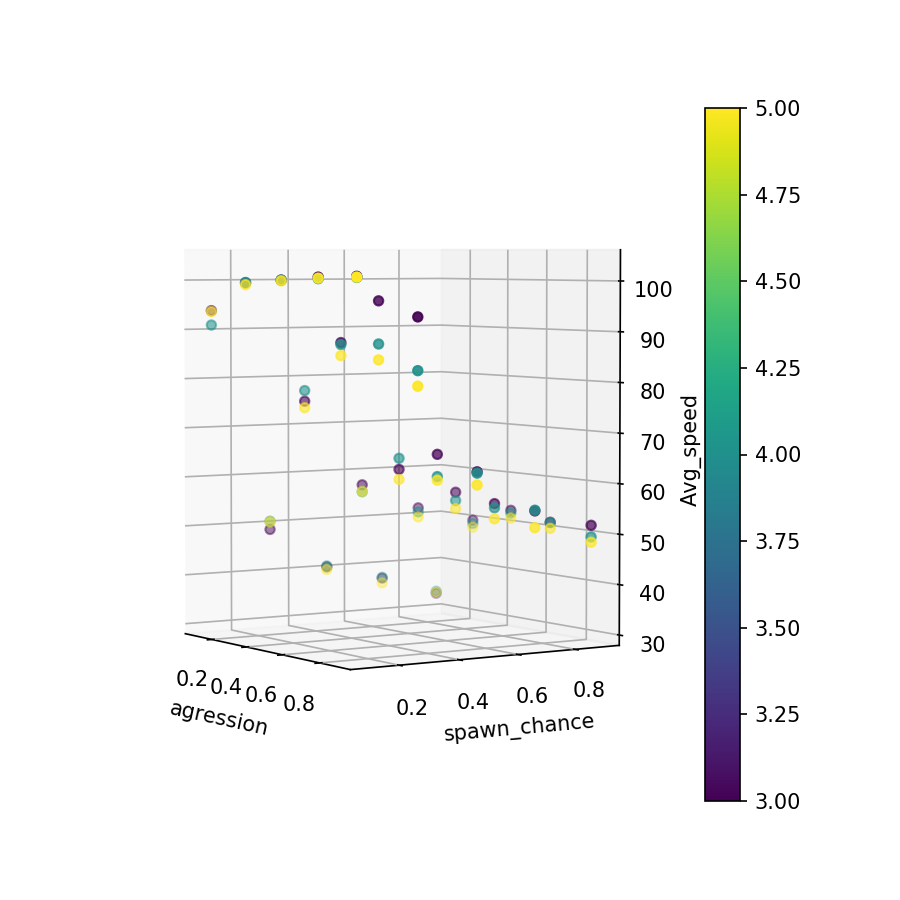

In [21]:
driedee = plt.figure(figsize=(6,6)).gca(projection='3d')
x_as = 'agression'
y_as = 'spawn_chance'
z_as = 'Avg_speed'
kleur = 'lanes'
p = driedee.scatter(rl2gm[x_as], rl2gm[y_as], rl2gm[z_as], c=rl2gm[kleur])
driedee.set_xlabel(x_as)
driedee.set_ylabel(y_as)
driedee.set_zlabel(z_as)
plt.colorbar(p)
plt.show()

In [56]:
ofat1 = rlanes.loc[(rlanes['spawn_chance'] >= 0.2) & (rlanes['spawn_chance'] <= 0.4)]
ofat2 = rl2gm.loc[(rl2gm['spawn_chance'] >= 0.2) & (rl2gm['spawn_chance'] <= 0.4)]
ofat3 = rl3gm.loc[(rl3gm['spawn_chance'] >= 0.2) & (rl3gm['spawn_chance'] <= 0.4)]
ofat4 = rl5gm.loc[(rl5gm['spawn_chance'] >= 0.2) & (rl5gm['spawn_chance'] <= 0.4)]
ofat5 = rl6gm.loc[(rl6gm['spawn_chance'] >= 0.2) & (rl6gm['spawn_chance'] <= 0.4)]

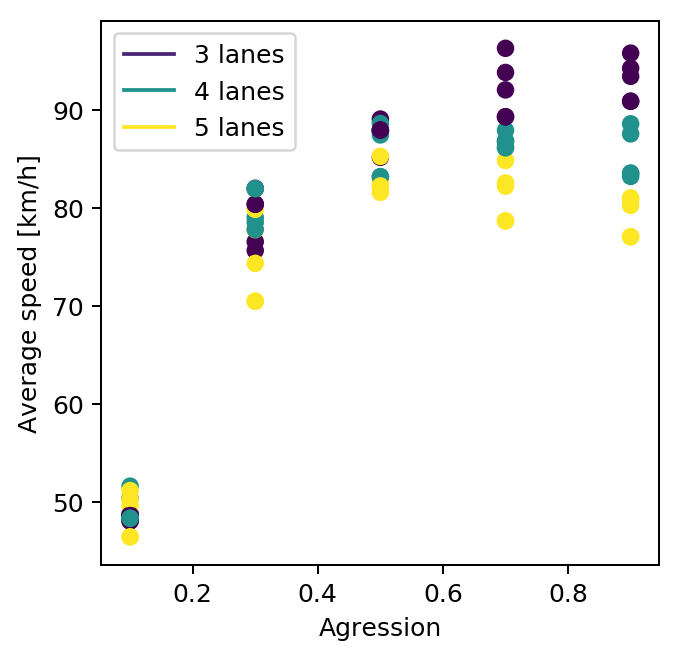

In [75]:
plt.figure(figsize=(4,4))
cmap = plt.cm.viridis
plt.scatter(ofat1['agression'], ofat1['Avg_speed'], c=ofat1['lanes'])
plt.scatter(ofat2['agression'], ofat2['Avg_speed'], c=ofat2['lanes'])
plt.scatter(ofat3['agression'], ofat3['Avg_speed'], c=ofat3['lanes'])
plt.scatter(ofat4['agression'], 100 - ofat4['Avg_speed'], c=ofat4['lanes'])
plt.scatter(ofat4['agression'], 100 - ofat4['Avg_speed'], c=ofat4['lanes'])
legend_elements = [
  Line2D([0], [0], color=cmap(0.1), label='3 lanes'),
  Line2D([0], [0], color=cmap(0.5), label='4 lanes'),
  Line2D([0], [0], color=cmap(1.0), label='5 lanes')
]
plt.legend(handles=legend_elements)
plt.xlabel('Agression')
plt.ylabel('Average speed [km/h]')
plt.show()

In [23]:
rl2gm

,Avg_speed,Cars_in_lane,Avg_slowdown,spawn_chance,agression,lanes
Run,,,,,,
-8869627827379392066,75.650817,175.7838,25.175523,0.3,0.3,3.0
-8869627827378227017,77.799090,234.9844,23.020138,0.3,0.3,4.0
-8869627827377061968,74.333500,299.0510,26.498494,0.3,0.3,5.0
-7544747479821721730,101.161208,52.7092,1.683183,0.1,0.9,3.0
-7544747479820556681,100.980709,73.5622,1.578836,0.1,0.9,4.0
-7544747479819391632,101.028871,73.2650,1.656370,0.1,0.9,5.0
-7329156073893653698,52.828347,282.2528,48.033609,0.7,0.3,3.0
-7329156073892488649,51.981600,378.9712,48.857008,0.7,0.3,4.0
-7329156073891323600,50.944340,482.3824,49.914363,0.7,0.3,5.0


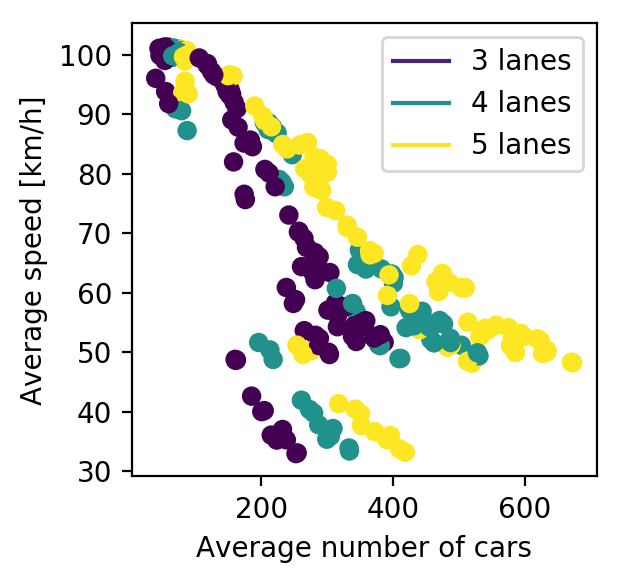

In [29]:
from matplotlib.lines import Line2D
y_as = 'Avg_speed'
x_as = 'Cars_in_lane'
kleur = 'lanes'
cmap = plt.cm.viridis
plt.figure(figsize=(3,3))
plt.scatter(rl2gm[x_as], rl2gm[y_as], c=rl2gm[kleur])
plt.scatter(rl3gm[x_as], rl3gm[y_as], c=rl3gm[kleur])
plt.scatter(rlanes[x_as], rlanes[y_as], c=rlanes[kleur])
plt.scatter(rl4gm[x_as], rl4gm[y_as], c=rl4gm[kleur])
plt.xlabel('Average number of cars')
plt.ylabel('Average speed [km/h]')
legend_elements = [
  Line2D([0], [0], color=cmap(0.1), label='3 lanes'),
  Line2D([0], [0], color=cmap(0.5), label='4 lanes'),
  Line2D([0], [0], color=cmap(1.0), label='5 lanes')
]
plt.legend(handles=legend_elements)
plt.show()

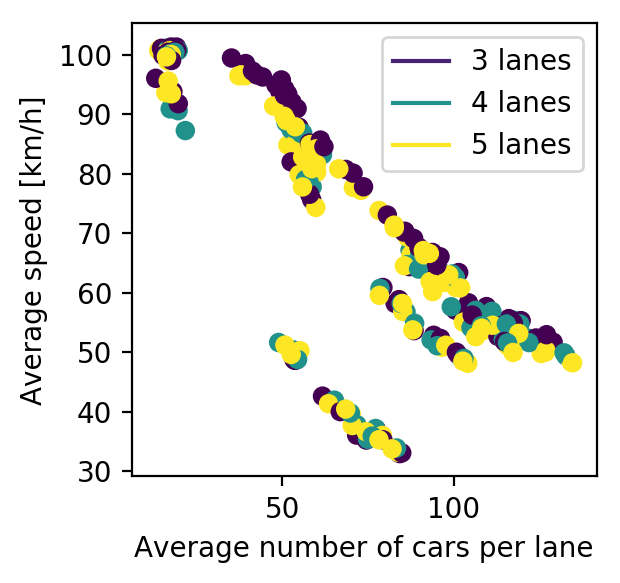

In [28]:
from matplotlib.lines import Line2D
y_as = 'Avg_speed'
x_as = 'Cars_in_lane'
kleur = 'lanes'
cmap = plt.cm.viridis
plt.figure(figsize=(3,3))
plt.scatter(rl2gm[x_as]/rl2gm[kleur], rl2gm[y_as], c=rl2gm[kleur])
plt.scatter(rl3gm[x_as]/rl3gm[kleur], rl3gm[y_as], c=rl3gm[kleur])
plt.scatter(rlanes[x_as]/rlanes[kleur], rlanes[y_as], c=rlanes[kleur])
plt.scatter(rl4gm[x_as]/rl4gm[kleur], rl4gm[y_as], c=rl4gm[kleur])
plt.xlabel('Average number of cars per lane')
plt.ylabel('Average speed [km/h]')
legend_elements = [
  Line2D([0], [0], color=cmap(0.1), label='3 lanes'),
  Line2D([0], [0], color=cmap(0.5), label='4 lanes'),
  Line2D([0], [0], color=cmap(1.0), label='5 lanes')
]
plt.legend(handles=legend_elements)
plt.show()